# <center>**Assignment 3: Deep Learning MLP and CNNs**</center>

Team N. 2. June 2023.

**Participantes:** 
- Julian Rodriguez Di Sipio
- Lucas Argento
- María Valentina Goyeneche Alvarado
- Alexandra Lozano Salazar

**Docente:**
- Luis Jose Talavera Mendez

# **1. Imports and dataset exploration**

In [ ]:
#!pip install tensorflow

In [ ]:
import keras 
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Fashion MNIST is a dataset from online fashion retailer Zalando consisting of a training set of 60,000 examples and a test set of 10,000 examples from one of 10 classes:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9	    | Ankle boot  |

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255.

The goal is to predict the clothing category from the pixel-values from an image.

The dataset can be directly loaded using a function from the keras library.



In [ ]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

Let's check the size of the training and testing sets.


In [ ]:
print('X training shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y training shape:', y_train.shape)
print('y test shape:', y_test.shape)

X training shape: (60000, 28, 28)
X test shape: (10000, 28, 28)
y training shape: (60000,)
y test shape: (10000,)


Each example is composed by 28 rows and 28 columns that contain the 784 pixel values for an image. For example, these are the two first rows for a single example.



In [ ]:
X_train[1][:2]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0]], dtype=uint8)

The y arrays are one-dimensional vectors with the class labels.

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We can display the first images in the training data to get an idea.

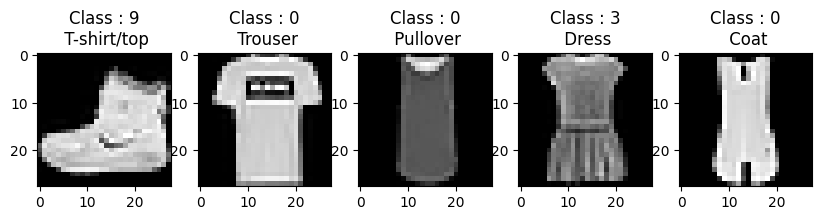

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
plt.figure(figsize=[10,10])

for i in range(5):
  n = int('15' + str(i + 1))
  plt.subplot(n)
  plt.imshow(X_train[i], cmap='gray')
  plt.title("Class : {}\n {}".format(y_train[i], class_names[i]))


We scale the data into the 0-1 range.

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

The network cannot work directly with categorical values, so we must convert them to numerical generating one boolean column (0/1) for each class category.

In [ ]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [ ]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Now, we split the training data into a training and a validation set using the `train_test_split` function from `sklearn` as usual.



In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=35, stratify = y_train_enc)

Let's check the shapes of the training and validation datasets.

In [ ]:
print('X training shape:',x_train.shape)
print('X validation shape:',x_val.shape)
print('y training shape:',y_train.shape)
print('y validation shape:',y_val.shape)

X training shape: (48000, 28, 28)
X validation shape: (12000, 28, 28)
y training shape: (48000, 10)
y validation shape: (12000, 10)


> Setting up cuda for gpu processing

In [ ]:
print("GPU available:", tf.test.is_gpu_available())

# Check TensorFlow GPU devices
print("GPU devices:")
tf.config.list_physical_devices('GPU')

GPU available: True
GPU devices:


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#**2. 2-layer Multilayer Perceptron**

---

**Build a keras model that represents a two-layer MLP, i.e., an input layer, a single hidden layer and an output layer.**

* **The input layer is a Flatten layer to convert the input into a single vector:**

> `Flatten(input_shape=(28,28,1)`

* **Add a Dense layer with 128 units and ReLu activation function as the hidden layer.**

* **Add a Dense layer with 10 units (one per class label) and softmax activation function as the output layer.**

**Compile the model and display the summary.**

---

In [ ]:
image_height = 28
image_width = 28
number_of_classes = 10

mlp = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_height, image_width, 1), name ="flatten_input"),
    keras.layers.Dense(128, activation='relu', name = "dense_1"),
    keras.layers.Dense(number_of_classes, activation='softmax', name = "output")
])

In [ ]:
mlp.compile(optimizer='adam',
            loss = "categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


---

**Train (fit) the model using a batch size of 256, 15 epochs and using the validation sets obtained above (x_val, y_val) as validation data.**

---

In [ ]:
history = mlp.fit(x_train, y_train, batch_size = 256, epochs = 15, validation_data = (x_val, y_val))

Epoch 1/15
188/188 [==============================] - 3s 6ms/step - loss: 0.6325 - accuracy: 0.7842 - val_loss: 0.5177 - val_accuracy: 0.8202
Epoch 2/15
188/188 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.8487 - val_loss: 0.4355 - val_accuracy: 0.8485
Epoch 3/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8606 - val_loss: 0.4046 - val_accuracy: 0.8599
Epoch 4/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8694 - val_loss: 0.4262 - val_accuracy: 0.8480
Epoch 5/15
188/188 [==============================] - 1s 5ms/step - loss: 0.3493 - accuracy: 0.8766 - val_loss: 0.3656 - val_accuracy: 0.8710
Epoch 6/15
188/188 [==============================] - 1s 6ms/step - loss: 0.3375 - accuracy: 0.8807 - val_loss: 0.3688 - val_accuracy: 0.8670
Epoch 7/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.8856 - val_loss: 0.3694 - val_accuracy: 0.8708
Epoch 

---

**Plot the loss and accuracy for the training and validation data**

**You can use the following code. It assumes that the object returning by the fit is named `model_history`, you can change the name.**

**Study the plots. Does the model overfit the data? Check if the behavior suggests that training should stop earlier or more epochs are needed. In that case, modify the number of epochs and train the model again.**

---

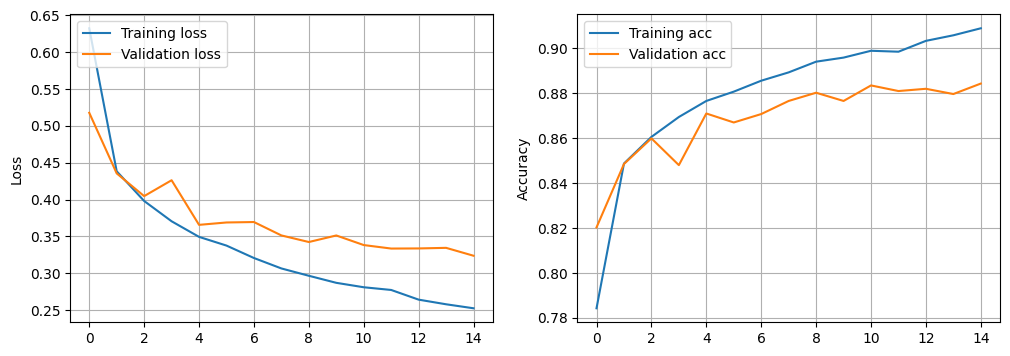

In [ ]:
def plot_learning_curves(model_history):
  plt.figure(figsize=[12,4])

  accuracy = model_history.history['accuracy']
  val_accuracy = model_history.history['val_accuracy']
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  plt.subplot(1, 2, 1)

  plt.ylabel('Loss')
  plt.plot(loss,label='Training loss');
  plt.plot(val_loss,label='Validation loss');
  plt.legend(loc='upper left')

  plt.grid()

  plt.subplot(1, 2, 2)

  plt.ylabel('Accuracy')
  plt.plot(accuracy,label='Training acc')
  plt.plot(val_accuracy,label='Validation acc')
  plt.legend(loc='upper left');

  plt.grid()

plot_learning_curves(model_history = history)


> We can see that both the validation and training losses were decreasing when the training stopped. We are going to train the model for some more epochs and see if it gets overfitted (greater gap between the curves) or if it continues to improve (both tend to a lower value at a similar "rate").

In [ ]:
image_height = 28
image_width = 28
number_of_classes = 10

mlp_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_height, image_width, 1), name ="flatten_input"),
    keras.layers.Dense(128, activation='relu', name = "dense_1"),
    keras.layers.Dense(number_of_classes, activation='softmax', name = "output")
])

mlp_2.compile(optimizer='adam',
            loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_2 = mlp_2.fit(x_train, y_train, batch_size = 256, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
188/188 [==============================] - 2s 5ms/step - loss: 0.6276 - accuracy: 0.7895 - val_loss: 0.4808 - val_accuracy: 0.8326
Epoch 2/30
188/188 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.8465 - val_loss: 0.4443 - val_accuracy: 0.8432
Epoch 3/30
188/188 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8611 - val_loss: 0.3998 - val_accuracy: 0.8616
Epoch 4/30
188/188 [==============================] - 1s 4ms/step - loss: 0.3683 - accuracy: 0.8714 - val_loss: 0.3835 - val_accuracy: 0.8690
Epoch 5/30
188/188 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8761 - val_loss: 0.3942 - val_accuracy: 0.8637
Epoch 6/30
188/188 [==============================] - 1s 4ms/step - loss: 0.3374 - accuracy: 0.8802 - val_loss: 0.3695 - val_accuracy: 0.8724
Epoch 7/30
188/188 [==============================] - 1s 4ms/step - loss: 0.3231 - accuracy: 0.8846 - val_loss: 0.3551 - val_accuracy: 0.8747
Epoch 

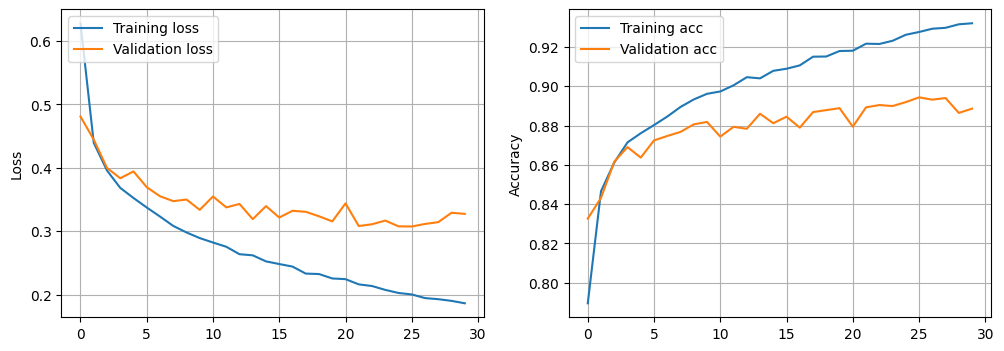

In [ ]:
plot_learning_curves(history_2)

> What we thought we saw in the previous plotting doesn't seem to be correct. The validation Loss starts to increase with the epochs wich is an indicator that the model is overfitting the data. This means that if we train for more epochs the gap between the val loss and the training loss should be even bigger. If we see that, we are going to train the model for fewer epochs (less than 15, at the moment where the val loss was the smallest).

In [ ]:
image_height = 28
image_width = 28
number_of_classes = 10

mlp_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_height, image_width, 1), name ="flatten_input"),
    keras.layers.Dense(128, activation='relu', name = "dense_1"),
    keras.layers.Dense(number_of_classes, activation='softmax', name = "output")
])

mlp_3.compile(optimizer='adam',
            loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_3 = mlp_3.fit(x_train, y_train, batch_size = 256, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.6410 - accuracy: 0.7830 - val_loss: 0.4855 - val_accuracy: 0.8332
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 0.4404 - accuracy: 0.8481 - val_loss: 0.4329 - val_accuracy: 0.8503
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4022 - accuracy: 0.8590 - val_loss: 0.4225 - val_accuracy: 0.8489
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3769 - accuracy: 0.8667 - val_loss: 0.4009 - val_accuracy: 0.8596
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3552 - accuracy: 0.8741 - val_loss: 0.3750 - val_accuracy: 0.8676
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3397 - accuracy: 0.8788 - val_loss: 0.3699 - val_accuracy: 0.8732
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.3283 - accuracy: 0.8824 - val_loss: 0.3536 - val_accuracy: 0.8775
Epoch 

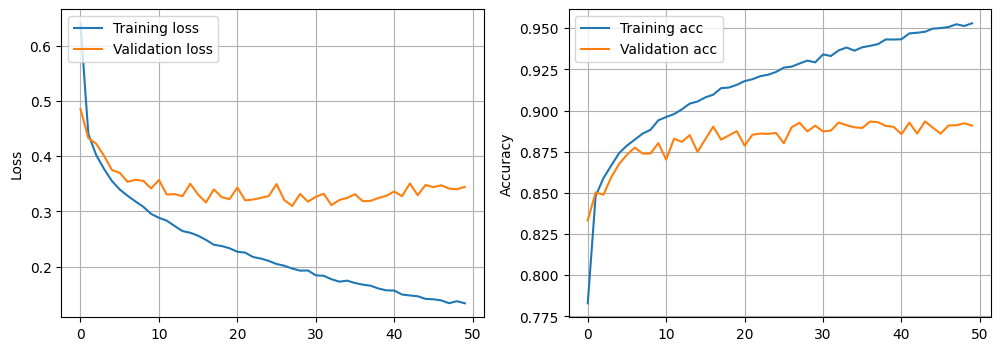

In [ ]:
plot_learning_curves(history_3)

> As we said before, this confirms the model is overfitting. We are going to train this MLP for only 14 epochs, the point were the val loss got to the lowest value. (we can use the mlp_1 that was trained for 15 epochs)

In [ ]:
min_val_loss_epoch = np.argmin(history.history['val_loss'])
print("Epoch with the minimum validation loss:", min_val_loss_epoch)

Epoch with the minimum validation loss: 14


---

**Evaluate your final model on the test data using the `evaluate` method. Check the loss and the accuracy.**

---

In [ ]:
loss, accuracy = mlp.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8840
Test Loss: 0.3623768985271454
Test Accuracy: 0.8840000033378601


---

**Use the ``classification_report`` function from ``scikit-learn`` to get the classification metrics on each class and see which classes are most frequently misclassified.**

**You can use the following code, substituting the `model` variable for the one containing your fitted model.**

---

In [ ]:
predict_test = mlp.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.88      0.89      0.89      1000
        Coat       0.76      0.85      0.81      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.78      0.61      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



> The overall performance is pretty good, but the classes that get miss classified the most are Pullover, Coat and Shirt.

#**3. Convolutional Neural Networks**

---

**Create a CNN model with the following layers:**

* **A convolutional layer with 32 filters, a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pool size**

* **A flatten layer**

* **A dense layer with 128 units and a ReLu activation function**

* **A dense layer with 10 units and a softmax activation function**

**Since the convolutional layer is the first, you must specify the size of the input as a parameter with**

> `input_shape=(28, 28, 1)`

**Compile the model and display the summary.**

---

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, 1)), # only one channel (greyscale)
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', name = "dense_fully_connected_layer"),
    keras.layers.Dense(10, activation='softmax', name ="output_layer")
])

cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_fully_connected_layer  (None, 128)              802944    
  (Dense)                                                        
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-tr

---

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

---

In [ ]:
cnn_history = cnn.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
188/188 [==============================] - 8s 9ms/step - loss: 0.5191 - accuracy: 0.8206 - val_loss: 0.4171 - val_accuracy: 0.8525
Epoch 2/25
188/188 [==============================] - 1s 6ms/step - loss: 0.3447 - accuracy: 0.8789 - val_loss: 0.3282 - val_accuracy: 0.8860
Epoch 3/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2962 - accuracy: 0.8952 - val_loss: 0.3166 - val_accuracy: 0.8907
Epoch 4/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2679 - accuracy: 0.9046 - val_loss: 0.2941 - val_accuracy: 0.8969
Epoch 5/25
188/188 [==============================] - 1s 8ms/step - loss: 0.2459 - accuracy: 0.9123 - val_loss: 0.2718 - val_accuracy: 0.9043
Epoch 6/25
188/188 [==============================] - 2s 8ms/step - loss: 0.2240 - accuracy: 0.9189 - val_loss: 0.2881 - val_accuracy: 0.8967
Epoch 7/25
188/188 [==============================] - 1s 7ms/step - loss: 0.2088 - accuracy: 0.9245 - val_loss: 0.2720 - val_accuracy: 0.9038
Epoch 

---

**Plot the loss and accuracy for the training and validation data.**

**Study the plots. Does the model overfit the data?**

---

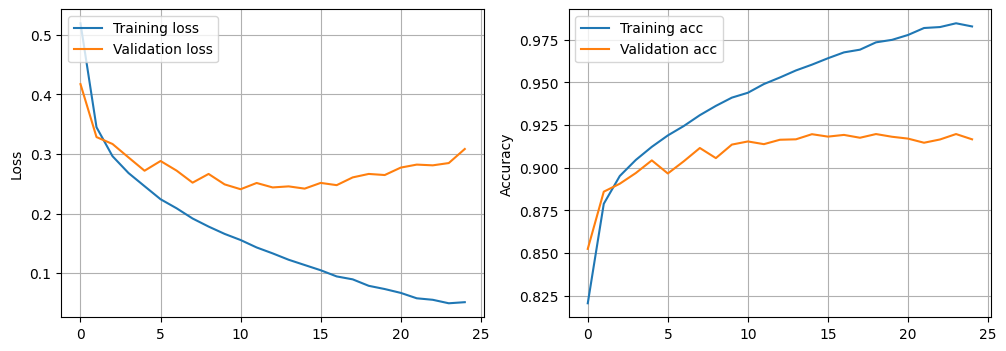

In [ ]:
plot_learning_curves(cnn_history)

> By looking at the graphs, it is clear how the gap between the validation loss and the training loss gets bigger as going through more epochs of training. The model is overfitting.

## 3.1 Early stopping

---

**If you think that the training should have stopped earlier to avoid overfitting, you can apply early stopping adding the following to the fit call:**

> `callbacks=EarlyStopping(monitor='val_loss',patience=3)`

**Plot the loss and accuracy for the training and validation data for the new model.**

---

In [ ]:
cnn_2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, 1)), # only one channel (greyscale)
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', name = "dense_fully_connected_layer"),
    keras.layers.Dense(10, activation='softmax', name ="output_layer")
])

cnn_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_fully_connected_layer  (None, 128)              802944    
  (Dense)                                                        
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-t

In [ ]:
# Train with early stopping
cnn_2_history = cnn_2.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val), callbacks=EarlyStopping(monitor='val_loss',patience=3))

Epoch 1/25
188/188 [==============================] - 3s 7ms/step - loss: 0.5187 - accuracy: 0.8232 - val_loss: 0.3644 - val_accuracy: 0.8742
Epoch 2/25
188/188 [==============================] - 1s 6ms/step - loss: 0.3333 - accuracy: 0.8829 - val_loss: 0.3231 - val_accuracy: 0.8888
Epoch 3/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2930 - accuracy: 0.8961 - val_loss: 0.3019 - val_accuracy: 0.8928
Epoch 4/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2605 - accuracy: 0.9072 - val_loss: 0.2852 - val_accuracy: 0.8989
Epoch 5/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2391 - accuracy: 0.9149 - val_loss: 0.2800 - val_accuracy: 0.9014
Epoch 6/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2175 - accuracy: 0.9223 - val_loss: 0.2788 - val_accuracy: 0.9016
Epoch 7/25
188/188 [==============================] - 1s 6ms/step - loss: 0.2018 - accuracy: 0.9283 - val_loss: 0.2568 - val_accuracy: 0.9088
Epoch 

---

**Select your final model with or without early stopping and apply it on the test data. Check the loss and the accuracy.**

**Print a classification report.**

---

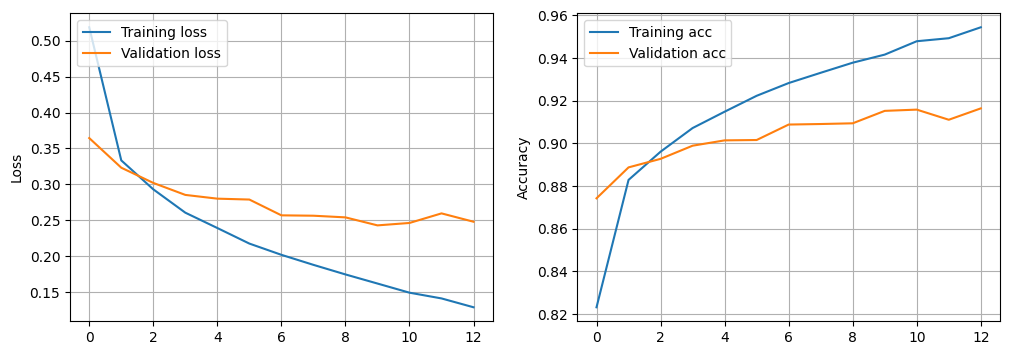

In [ ]:
plot_learning_curves(cnn_2_history)

In [ ]:
loss, accuracy = cnn_2.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.9120
Test Loss: 0.26683908700942993
Test Accuracy: 0.9120000004768372


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.9128
Test Loss: 0.3364165425300598
Test Accuracy: 0.9128000140190125


In [ ]:
predict_test = cnn_2.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.86      0.86      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.80      0.71      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
predict_test = cnn.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.91      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.83      0.87      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.73      0.75      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



> The performance is similar but the early stopped model has better precision overall for all classes.

## 3.2 Dropout

---

**A way to avoid overfitting is to add dropout layers. Add one dropout layer with a 0.25 rate to the previous model. Place it after the max-pooling layer. Add another after the first dense layer**

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

**Plot the loss and accuracy for the training and validation data for the new model.**

**You can also check how the dropout works with and without early stopping.**

---



In [ ]:
dropout_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, 1)), # only one channel (greyscale)
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', name = "dense_fully_connected_layer"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', name ="output_layer")
])

dropout_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dropout_cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_fully_connected_layer  (None, 128)              802944    
  (Dense)                                                        
                                                                 
 dropout_1 (Dropout)         (None, 128)             

---

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

---

In [ ]:
droput_history = dropout_cnn.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val), callbacks=EarlyStopping(monitor='val_loss',patience=3))

Epoch 1/25
188/188 [==============================] - 4s 10ms/step - loss: 0.6835 - accuracy: 0.7596 - val_loss: 0.4066 - val_accuracy: 0.8534
Epoch 2/25
188/188 [==============================] - 1s 7ms/step - loss: 0.4337 - accuracy: 0.8487 - val_loss: 0.3520 - val_accuracy: 0.8736
Epoch 3/25
188/188 [==============================] - 1s 8ms/step - loss: 0.3794 - accuracy: 0.8658 - val_loss: 0.3119 - val_accuracy: 0.8896
Epoch 4/25
188/188 [==============================] - 1s 7ms/step - loss: 0.3524 - accuracy: 0.8753 - val_loss: 0.2976 - val_accuracy: 0.8932
Epoch 5/25
188/188 [==============================] - 1s 6ms/step - loss: 0.3314 - accuracy: 0.8807 - val_loss: 0.2890 - val_accuracy: 0.8968
Epoch 6/25
188/188 [==============================] - 1s 6ms/step - loss: 0.3129 - accuracy: 0.8869 - val_loss: 0.2716 - val_accuracy: 0.9022
Epoch 7/25
188/188 [==============================] - 1s 8ms/step - loss: 0.3029 - accuracy: 0.8913 - val_loss: 0.2669 - val_accuracy: 0.9045
Epoch

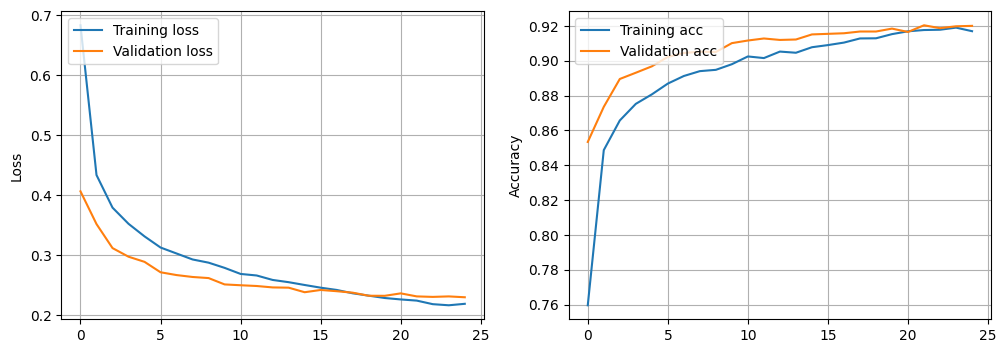

In [ ]:
plot_learning_curves(droput_history)

---

**Select the model with or without early stopping (but with dropout) and evaluate it on test data**

**Print the classification report**

---

In [ ]:
loss, accuracy = dropout_cnn.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predict_test = dropout_cnn.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 5ms/step - loss: 0.2453 - accuracy: 0.9160
Test Loss: 0.2453390657901764
Test Accuracy: 0.9160000085830688
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.85      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.86      0.87      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.75      0.76      0.76      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



> The model with dropout performs slightly better on test data when trained over the same number of epochs, this means that this technique is effectively reducing overfitting. 

*Dropout is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (setting to zero) a fraction of the input units or neurons during training. By doing so, dropout helps to reduce the reliance of the model on specific neurons, forcing it to learn more robust and generalized representations.*

## 3.3 Custom Model

---
**Now create a model with the following layers:**

* **A convolutional layer with 32 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'` (input layer)**

* **A max-pooling layer with a 2x2 pooling size**

* **A convolutional layer with 64 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pooling size**

* **A dropout layer with a 0.3 rate**

* **A convolutional layer with 128 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A convolutional layer with 128 filters and a 3x3 kernel size, a ReLu activation function and `padding='same'`**

* **A max-pooling layer with a 2x2 pooling size**

* **A dropout layer with a 0.4 rate**

* **A flatten layer**

* **A dense layer with 512 units**

* **A dropout layer with a 0.25 rate**

* **A dense layer with 10 units and a softmax activation function**

---



In [ ]:
custom_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

custom_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

custom_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)       

**Compile the model**

**Train (fit) the model using a batch size of 256, 25 epochs and using the validation sets obtained above (x_val,y_val) as validation data.**

**Plot the loss and accuracy for the training and validation data for the new model.**

**Evaluate the model on the test set**


In [ ]:
custom_history = custom_model.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
188/188 [==============================] - 8s 26ms/step - loss: 0.7161 - accuracy: 0.7310 - val_loss: 0.3938 - val_accuracy: 0.8584
Epoch 2/25
188/188 [==============================] - 4s 20ms/step - loss: 0.4005 - accuracy: 0.8524 - val_loss: 0.3388 - val_accuracy: 0.8757
Epoch 3/25
188/188 [==============================] - 3s 14ms/step - loss: 0.3391 - accuracy: 0.8746 - val_loss: 0.2936 - val_accuracy: 0.8947
Epoch 4/25
188/188 [==============================] - 3s 14ms/step - loss: 0.3074 - accuracy: 0.8865 - val_loss: 0.2750 - val_accuracy: 0.9002
Epoch 5/25
188/188 [==============================] - 3s 16ms/step - loss: 0.2817 - accuracy: 0.8964 - val_loss: 0.2687 - val_accuracy: 0.9017
Epoch 6/25
188/188 [==============================] - 3s 14ms/step - loss: 0.2651 - accuracy: 0.9024 - val_loss: 0.2458 - val_accuracy: 0.9093
Epoch 7/25
188/188 [==============================] - 3s 14ms/step - loss: 0.2489 - accuracy: 0.9074 - val_loss: 0.2495 - val_accuracy: 0.9071

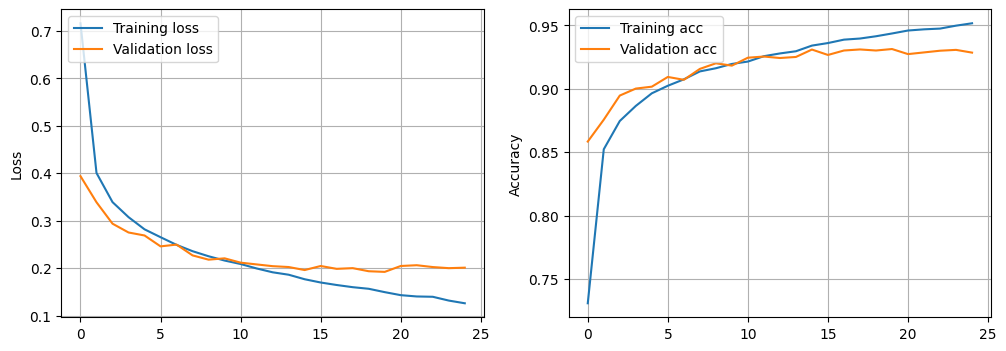

In [ ]:
plot_learning_curves(custom_history)

In [ ]:
loss, accuracy = custom_model.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predict_test = custom_model.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 2s 5ms/step - loss: 0.2205 - accuracy: 0.9240
Test Loss: 0.22051821649074554
Test Accuracy: 0.9240000247955322
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.87      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.83      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.85      0.91      0.88      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.76      0.79      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



> The model performance on the training set is better than before, but it performs the same (and far from the train performance) on the validation and testing set. This could mean the model is overfitting the data. Lets try to prevent this by adding early stoping and tinkering a little bit on the architecture


**To complete the assignment, you can try to add early stopping to the mode or modify other parameters (number of filters, activation functions, dropout rate) and even adding new layers**

In [ ]:
custom_model_2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

custom_model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

custom_model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 128)       

Epoch 1/25
188/188 [==============================] - 7s 17ms/step - loss: 0.7181 - accuracy: 0.7293 - val_loss: 0.4136 - val_accuracy: 0.8514
Epoch 2/25
188/188 [==============================] - 3s 14ms/step - loss: 0.4052 - accuracy: 0.8510 - val_loss: 0.3265 - val_accuracy: 0.8784
Epoch 3/25
188/188 [==============================] - 3s 15ms/step - loss: 0.3432 - accuracy: 0.8742 - val_loss: 0.2950 - val_accuracy: 0.8907
Epoch 4/25
188/188 [==============================] - 3s 14ms/step - loss: 0.3121 - accuracy: 0.8852 - val_loss: 0.2670 - val_accuracy: 0.9037
Epoch 5/25
188/188 [==============================] - 3s 15ms/step - loss: 0.2830 - accuracy: 0.8957 - val_loss: 0.2697 - val_accuracy: 0.8987
Epoch 6/25
188/188 [==============================] - 3s 17ms/step - loss: 0.2669 - accuracy: 0.9006 - val_loss: 0.2611 - val_accuracy: 0.9054
Epoch 7/25
188/188 [==============================] - 3s 14ms/step - loss: 0.2491 - accuracy: 0.9062 - val_loss: 0.2335 - val_accuracy: 0.9138

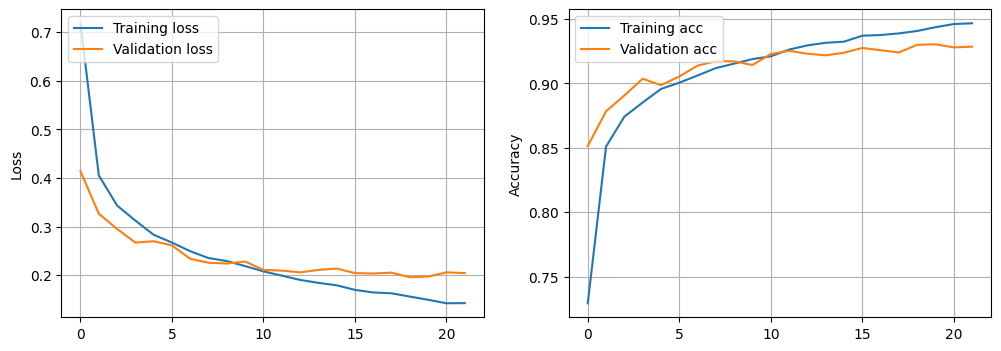

In [ ]:
custom_2_history = custom_model_2.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val), callbacks=EarlyStopping(monitor='val_loss',patience=3))
plot_learning_curves(custom_2_history)

In [ ]:
loss, accuracy = custom_model_2.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predict_test = custom_model_2.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9270
Test Loss: 0.21673071384429932
Test Accuracy: 0.9269999861717224
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.90      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.87      0.88      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.85      0.91      0.88      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.79      0.79      1000
     Sneaker       0.94      0.99      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



> We managed to get a 1% more out of the model. Lets try by adding some more convolutional layers. 

In [ ]:
custom_model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

custom_model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

custom_model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)       

Epoch 1/25
188/188 [==============================] - 8s 18ms/step - loss: 0.8497 - accuracy: 0.6722 - val_loss: 0.4731 - val_accuracy: 0.8171
Epoch 2/25
188/188 [==============================] - 3s 18ms/step - loss: 0.4565 - accuracy: 0.8308 - val_loss: 0.3630 - val_accuracy: 0.8632
Epoch 3/25
188/188 [==============================] - 4s 22ms/step - loss: 0.3735 - accuracy: 0.8617 - val_loss: 0.3235 - val_accuracy: 0.8836
Epoch 4/25
188/188 [==============================] - 3s 16ms/step - loss: 0.3313 - accuracy: 0.8764 - val_loss: 0.3181 - val_accuracy: 0.8806
Epoch 5/25
188/188 [==============================] - 3s 15ms/step - loss: 0.3075 - accuracy: 0.8851 - val_loss: 0.2639 - val_accuracy: 0.9053
Epoch 6/25
188/188 [==============================] - 3s 15ms/step - loss: 0.2821 - accuracy: 0.8963 - val_loss: 0.2547 - val_accuracy: 0.9083
Epoch 7/25
188/188 [==============================] - 3s 16ms/step - loss: 0.2665 - accuracy: 0.9010 - val_loss: 0.2346 - val_accuracy: 0.9144

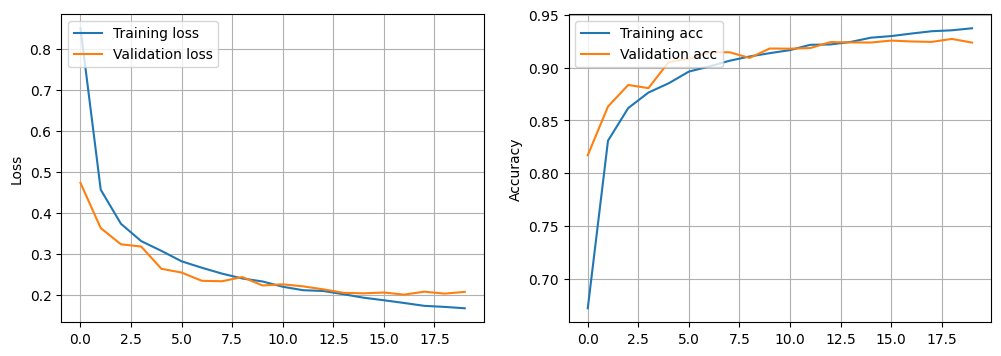

In [ ]:
custom_3_history = custom_model_3.fit(x_train, y_train, batch_size = 256, epochs = 25, validation_data = (x_val, y_val), callbacks=EarlyStopping(monitor='val_loss',patience=3))
plot_learning_curves(custom_3_history)

In [ ]:
loss, accuracy = custom_model_3.evaluate(X_test, y_test_enc)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predict_test = custom_model_3.predict(X_test)
y_pred = np.argmax(predict_test,axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 [==============================] - 1s 4ms/step - loss: 0.2240 - accuracy: 0.9212
Test Loss: 0.2239929884672165
Test Accuracy: 0.9211999773979187
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.91      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.85      0.91      0.88      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.87      0.88      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.69      0.75      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



> That didn't improve the performance. As next steps for the future, we could study different CNN architechtures and replicate them in Keras to see wich of them is better suited for this problem.